In [1]:
import arviz as az
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pymc3 as pm
from pymc3 import traceplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

print('Running on PyMC3 v{}'.format(pm.__version__))
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\Users\aless\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.9.3


## Importing the dataset

In [2]:
zuco_ds = pd.read_csv('../Lexicons/ZuCo_words_dataset.csv')
anger_lex = pd.read_csv('../Lexicons/NRC_Emotion_Intensity_Lexicon/NRC-Emotion-Intensity-anger-scores.csv')
anger_ds = pd.merge(zuco_ds, anger_lex, how ='inner', on =['Word'])
anger_ds = anger_ds.drop(columns='Word')

## Data scaling

In [3]:
scaler = MinMaxScaler()
anger_ds = pd.DataFrame(scaler.fit_transform(anger_ds), columns=anger_ds.columns)

## Model building

In [4]:
X = anger_ds.iloc[:,:-1]
y = anger_ds.iloc[:,-1]
formula = 'y ~ ' + ' + '.join(['%s' % variable for variable in X.columns[:]])

In [5]:
with pm.Model() as model:
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    # specify glm and pass in data. The resulting linear model, its likelihood and
    # and all its parameters are automatically added to our model.
    # Creating the model requires a formula and data (and optionally a family)
    model = pm.GLM.from_formula(formula, data = X, family = family)
    # Perform Markov Chain Monte Carlo sampling
    trace = pm.sample(draws=2000, chains=2, tune=500) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, FFD, GD, TRT, MPS, Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 483 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


D:\Users\aless\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-6-c05a448fd6ae>:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout();
D:\Users\aless\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171950DBFA0>,
      dtype=object)

<Figure size 700x700 with 0 Axes>

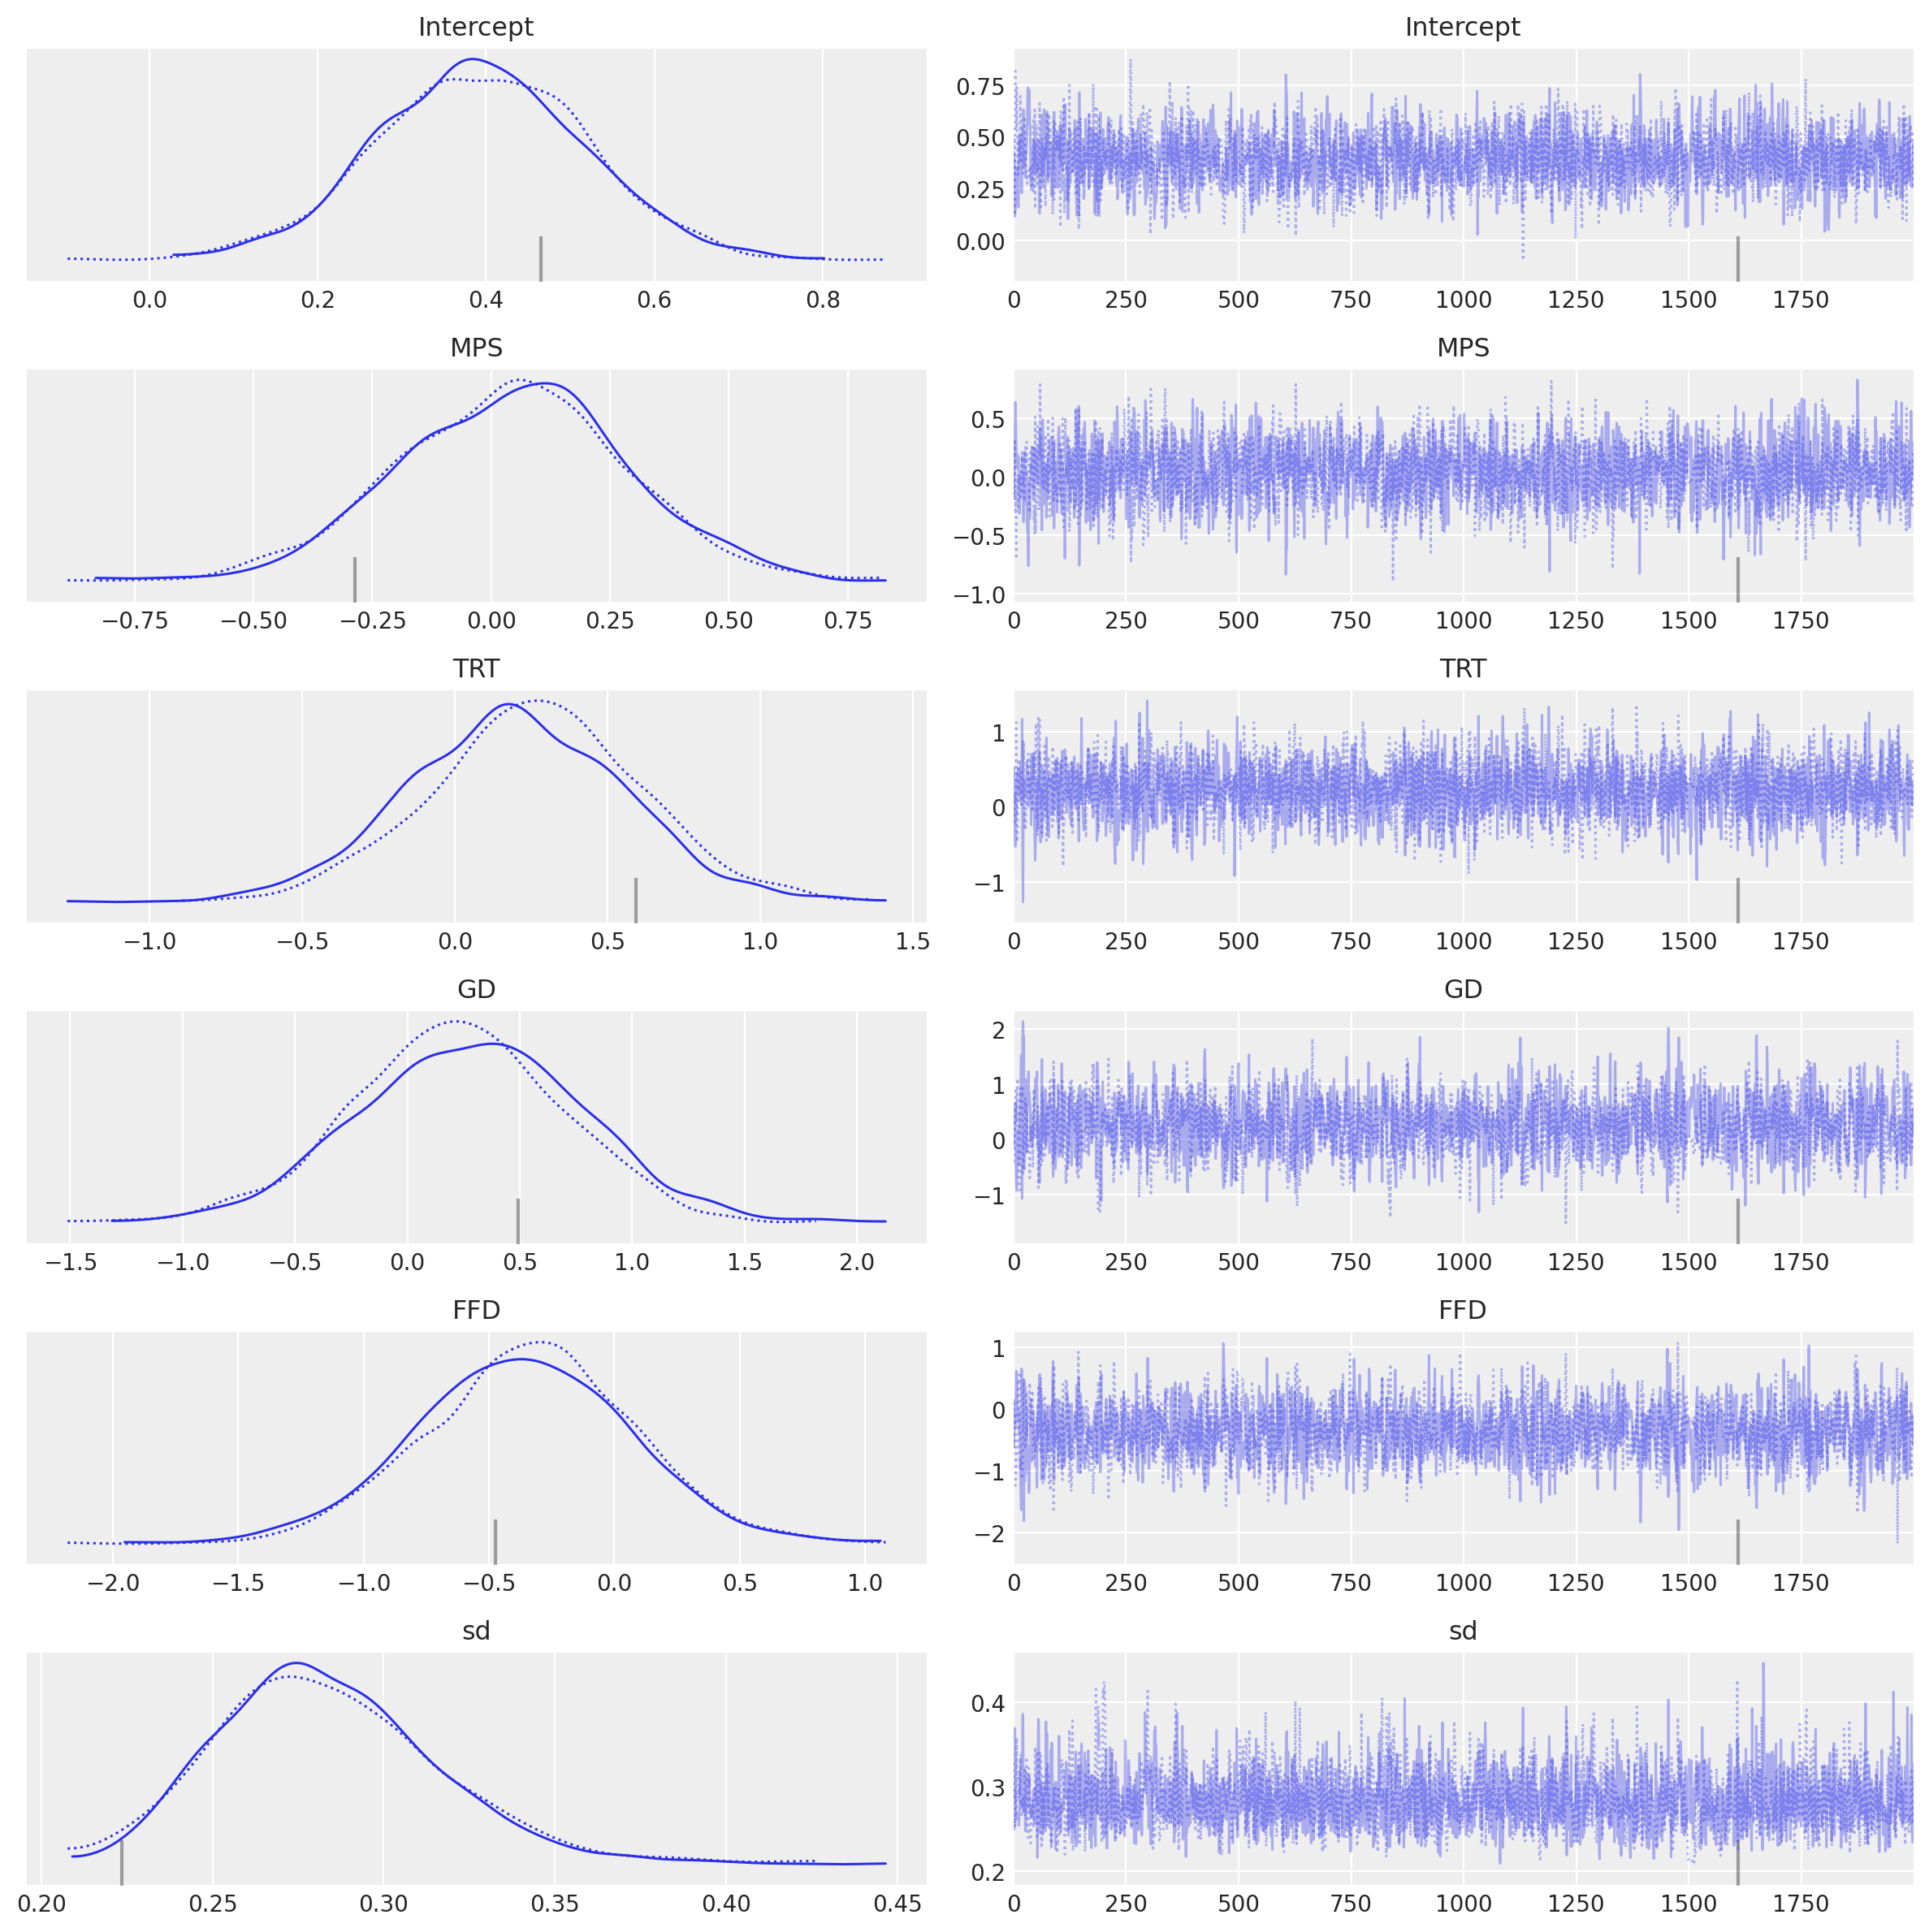

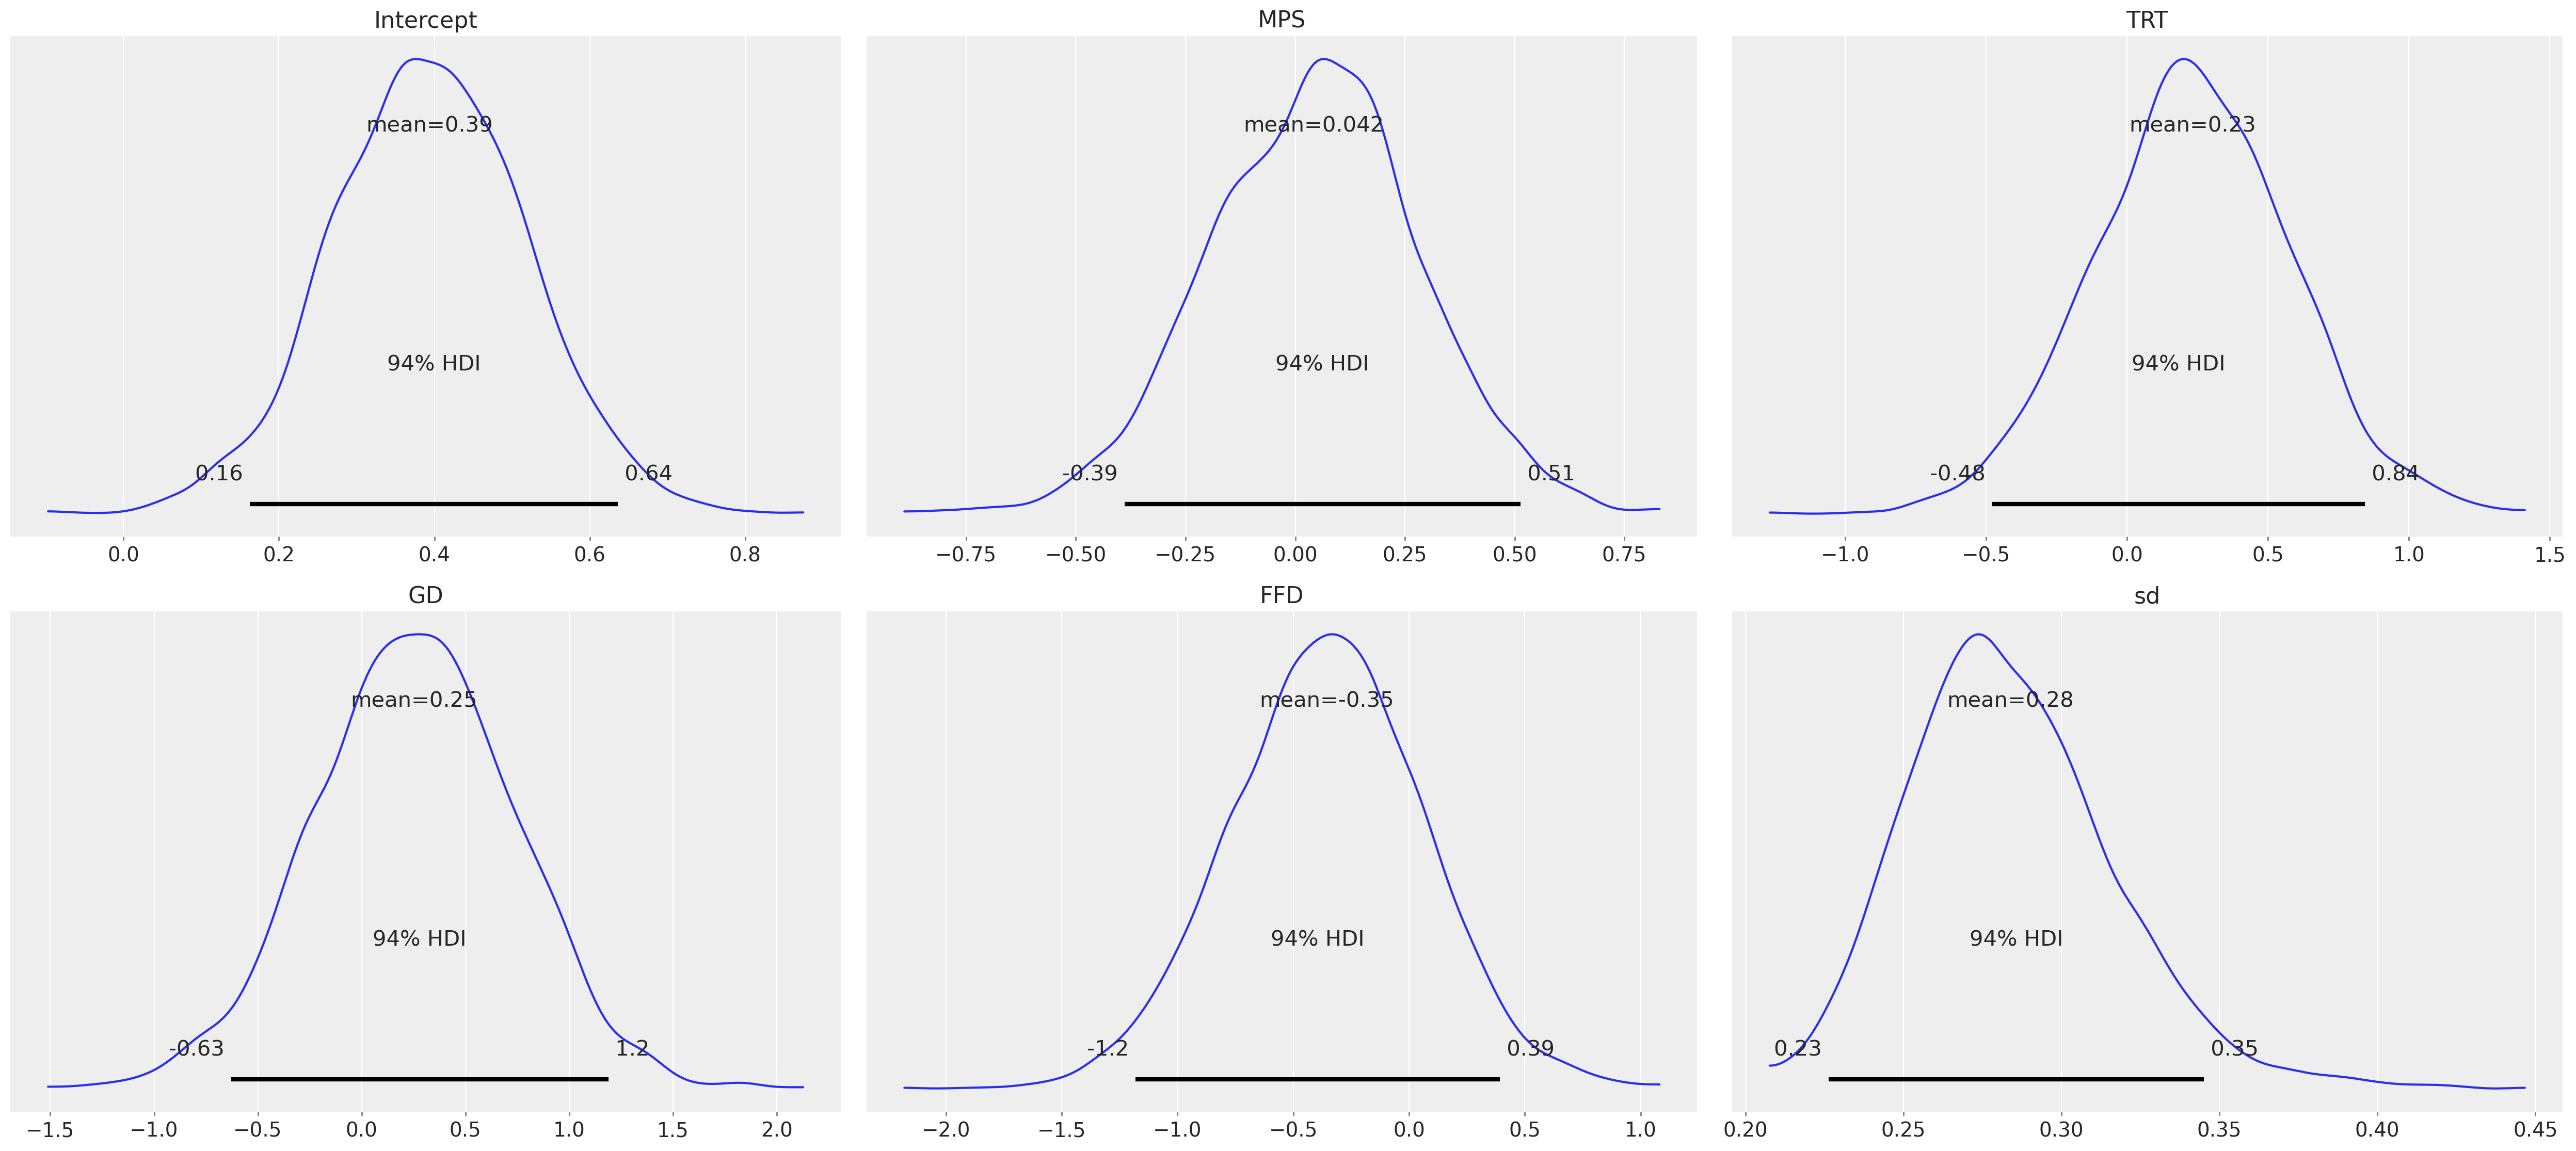

In [6]:
plt.figure(figsize=(7, 7))
traceplot(trace)
plt.tight_layout();
pm.plot_posterior(trace)

In [7]:
az.summary(trace, round_to=2)

D:\Users\aless\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,0.39,0.13,0.16,0.64,0.00,0.00,2138.43,2122.94,2134.48,2365.55,1.00
MPS,0.04,0.24,-0.39,0.51,0.01,0.00,2291.59,2109.62,2292.87,2449.36,1.00
TRT,0.23,0.35,-0.48,0.84,0.01,0.01,2764.42,2430.40,2774.63,2471.33,1.01
GD,0.25,0.49,-0.63,1.19,0.01,0.01,1815.51,1594.29,1815.98,2211.38,1.00
FFD,-0.35,0.42,-1.18,0.39,0.01,0.01,2002.81,1739.45,2001.83,2080.03,1.00
sd,0.28,0.03,0.23,0.35,0.00,0.00,1586.75,1586.75,1478.19,1410.69,1.00
